>Gross domestic product [GDP](https://en.wikipedia.org/wiki/Gross_domestic_product) is a monetary measure of the market value of all the final goods and services produced in a specific time period.
>GDP (nominal) per capita does not, however, reflect differences in the cost of living and the inflation rates of the countries; therefore, using a basis of GDP per capita at purchasing power parity (PPP) is arguably more useful when comparing living standards between nations, while nominal GDP is more useful comparing national economies on the international market.
# Table of Contents
1. [Step 1 - The Data](#step1)
1. [Step 2 - Linear Regression and time series using SciPy](#step2)
1. [Step 3 - Linear Regression and time series using SciKit-Learn](#step3)
1. [Step 4 - Linear Regression and time series using Bokeh](#step4)
1. [Step 5 - Dashboard in Tableau Public](#step5)

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

Python version: 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # collection of functions for scientific and publication-ready visualization
import numpy as np # linear algebra
import json
import bokeh
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models.widgets import Select
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
from bokeh.io import output_notebook
output_notebook() # output_file("project.html")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading BokehJS ...

/kaggle/input/gdp2017/GDP.csv
/kaggle/input/global/countries.json


<a id="step1"></a>
## The Data
Use the csv file found in the data folder in this project. 

It is the same data set you used for the tidy exercise.

In [3]:
gdp_data = pd.read_csv('../input/gdp2017/GDP.csv',skiprows = 3) # matrixds_project_files
gdp_data.drop(['Unnamed: 62'],axis=1, inplace=True) # Drop the last column Unnamed
# gdp_data.info()

In [4]:
gdp_data.shape # 264 countries in 2018

(264, 62)

In [5]:
gdp_data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11


In [6]:
id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code']
df = pd.melt(frame=gdp_data, id_vars=id_vars, var_name='year', value_name='GDP') # country_x_2018_forecast
# df.describe()
df['year'] = df['year'].astype(int) # convert from object to float or int
df.info() # confirm data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    15312 non-null  object 
 1   Country Code    15312 non-null  object 
 2   Indicator Name  15312 non-null  object 
 3   Indicator Code  15312 non-null  object 
 4   year            15312 non-null  int64  
 5   GDP             11777 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 717.9+ KB


In [7]:
df.shape

(15312, 6)

In [8]:
df = df.dropna() # drop rows where GDP is NaN
df.shape

(11777, 6)

In [9]:
df.head(50)

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
11,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.857319e+10
12,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,1960,6.592694e+09
14,Burundi,BDI,GDP (current US$),NY.GDP.MKTP.CD,1960,1.960000e+08
15,Belgium,BEL,GDP (current US$),NY.GDP.MKTP.CD,1960,1.165872e+10
16,Benin,BEN,GDP (current US$),NY.GDP.MKTP.CD,1960,2.261956e+08
17,Burkina Faso,BFA,GDP (current US$),NY.GDP.MKTP.CD,1960,3.304428e+08
18,Bangladesh,BGD,GDP (current US$),NY.GDP.MKTP.CD,1960,4.274894e+09
21,"Bahamas, The",BHS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.698039e+08
24,Belize,BLZ,GDP (current US$),NY.GDP.MKTP.CD,1960,2.807189e+07


In [10]:
df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df.rename(columns={'Country Name':'Country'}, inplace=True)
df.head(3)

,Country,year,GDP
1,Afghanistan,1960,5.377778e+08
11,Australia,1960,1.857319e+10
12,Austria,1960,6.592694e+09


In [11]:
df['Country'].value_counts() # Pre-demographic dividend?

IDA & IBRD total              58
Early-demographic dividend    58
IDA only                      58
Burkina Faso                  58
Cote d'Ivoire                 58
                              ..
Nauru                         11
Channel Islands               10
South Sudan                    6
Somalia                        5
Cayman Islands                 2
Name: Country, Length: 256, dtype: int64

In [12]:
values = ['Arab World',
          'Caribbean small states',
          'Central Europe and the Baltics',
          'Early-demographic dividend',
          'East Asia & Pacific (excluding high income)',
          'Early-demographic dividend',
          'East Asia & Pacific',
          'East Asia & Pacific (IDA & IBRD countries)',
          'Europe & Central Asia',
          'Europe & Central Asia (IDA & IBRD countries)',
          'Europe & Central Asia (excluding high income)',
          'Euro area',
          'European Union',
          'Fragile and conflict affected situations',
          'Heavily indebted poor countries (HIPC)',
          'High income',
          'IBRD only',
          'IDA & IBRD total',
          'IDA total',
          'IDA blend',
          'IDA only',
          'Late-demographic dividend',
          'Latin America and Caribbean',
          'Latin America & Caribbean',
          'Latin America & Caribbean (excluding high income)',
          'Latin America & the Caribbean (IDA & IBRD countries)',
          'Lower middle income',
          'Low & middle income',
          'Middle income',
          'Middle East & North Africa (IDA & IBRD countries)',
          'Middle East & North Africa',
          'Middle East & North Africa (excluding high income)',
          'North America',
          'OECD members',
          'Pacific island small states',
          'Post-demographic dividend',
          'Pre-demographic dividend',
          'South Asia (IDA & IBRD)',
          'Sub-Saharan Africa (IDA & IBRD countries)',
          'Sub-Saharan Africa (excluding high income)',
          'Sub-Saharan Africa',
          'Small states',
          'Upper middle income',
          'World']
for i in range(0, 60):
    for value in values:
        condition = df[df.Country == value].index
        df.drop(condition, inplace=True)

# df[df['column name'].map(lambda x: str(x)!=".")]

# df.where(m, -df)
df.head(50)

,Country,year,GDP
1,Afghanistan,1960,5.377778e+08
11,Australia,1960,1.857319e+10
12,Austria,1960,6.592694e+09
14,Burundi,1960,1.960000e+08
15,Belgium,1960,1.165872e+10
16,Benin,1960,2.261956e+08
17,Burkina Faso,1960,3.304428e+08
18,Bangladesh,1960,4.274894e+09
21,"Bahamas, The",1960,1.698039e+08
24,Belize,1960,2.807189e+07


In [13]:
df.tail(50)

,Country,year,GDP
15240,Portugal,2017,2.175711e+11
15241,Paraguay,2017,2.973490e+10
15242,West Bank and Gaza,2017,1.449810e+10
15246,Qatar,2017,1.676052e+11
15247,Romania,2017,2.118033e+11
15248,Russian Federation,2017,1.577524e+12
15249,Rwanda,2017,9.136690e+09
15250,South Asia,2017,3.291738e+12
15251,Saudi Arabia,2017,6.838271e+11
15252,Sudan,2017,1.174879e+11


In [14]:
df.shape

(9581, 3)

In [15]:
filename = 'GDP_tidy.csv'
df.to_csv(filename, index=False)
print("{} saved".format(filename))

GDP_tidy.csv saved


In [16]:
# Adding a default
country = 'Mexico'
filter = df['Country'] != country
dfmx = df.drop(df[filter].index, inplace=False) # filter by country
# df.shape
dfmx.tail(5)

,Country,year,GDP
14144,Mexico,2013,1.274443e+12
14408,Mexico,2014,1.314385e+12
14672,Mexico,2015,1.169623e+12
14936,Mexico,2016,1.076912e+12
15200,Mexico,2017,1.149919e+12


In [17]:
# Adding a default
country = 'United States'
filter = df['Country'] != country
dfus = df.drop(df[filter].index, inplace=False) # filter by country
# df.shape
dfus.tail(5)

,Country,year,GDP
14241,United States,2013,1.669152e+13
14505,United States,2014,1.742761e+13
14769,United States,2015,1.812071e+13
15033,United States,2016,1.862448e+13
15297,United States,2017,1.939060e+13


In [18]:
# Adding a default
country = 'Spain'
filter = df['Country'] != country
dfsp = df.drop(df[filter].index, inplace=False) # filter by country
# df.shape
dfsp.tail(5)

,Country,year,GDP
14060,Spain,2013,1.361854e+12
14324,Spain,2014,1.376911e+12
14588,Spain,2015,1.197790e+12
14852,Spain,2016,1.237255e+12
15116,Spain,2017,1.311320e+12


In [19]:
# Adding a default
country = 'Canada'
filter = df['Country'] != country
dfca = df.drop(df[filter].index, inplace=False) # filter by country
# df.shape
dfca.tail(5)

,Country,year,GDP
14025,Canada,2013,1.842628e+12
14289,Canada,2014,1.799269e+12
14553,Canada,2015,1.559623e+12
14817,Canada,2016,1.535768e+12
15081,Canada,2017,1.653043e+12


In [20]:
# Adding a default
country = 'China'
filter = df['Country'] != country
dfch = df.drop(df[filter].index, inplace=False) # filter by country
# df.shape
dfch.tail(5)

,Country,year,GDP
14030,China,2013,9.607224e+12
14294,China,2014,1.048237e+13
14558,China,2015,1.106467e+13
14822,China,2016,1.119099e+13
15086,China,2017,1.223770e+13


In [21]:
# Adding a default
country = 'India'
filter = df['Country'] != country
dfin = df.drop(df[filter].index, inplace=False) # filter by country
# df.shape
dfin.tail(5)

,Country,year,GDP
14099,India,2013,1.856722e+12
14363,India,2014,2.039127e+12
14627,India,2015,2.102391e+12
14891,India,2016,2.274230e+12
15155,India,2017,2.597491e+12


<a id="step2"></a>
## Linear Regression and time series using SciPy
https://www.w3schools.com/python/python_ml_linear_regression.asp

### Build a forecasting model for each countries 2018 GDP. 

### Use the linear regression and time series concepts from earlier lectures.

Model Prediction GDP Mexico (2018) = $1131888421568.4062 MXN
SciPy


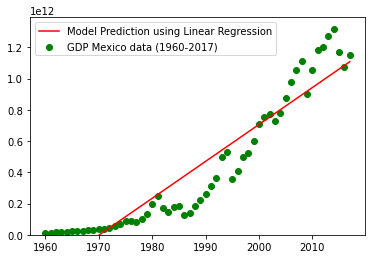

In [22]:
from scipy import stats
X = dfmx.year
y = dfmx.GDP
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
# Model Prediction GDP Mexico (2018) = $1,131,888,421,568.4062 MXN
model = list(map(modelPrediction, X)) # scipy
x_pred = 2018
y_pred = modelPrediction(x_pred)
print('Model Prediction GDP Mexico (2018) = ${} MXN'.format(y_pred))
print('SciPy')
plt.scatter(X, y, color='green') # Scatter Plot
plt.plot(X, model, color='red') # linestyle='dashed', marker='o', markersize=12
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction using Linear Regression', 'GDP Mexico data (1960-2017)'])
plt.show()

Model Prediction GDP US (2018) = $16904994673321.25 USD
SciPy


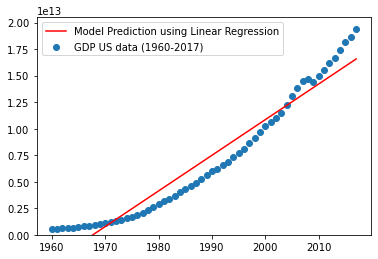

In [23]:
from scipy import stats
X = dfus.year
y = dfus.GDP
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
# Model Prediction GDP US (2018) = $16,904,994,673,321.25 USD
model = list(map(modelPrediction, X)) # scipy
x_pred = 2018
y_pred = modelPrediction(x_pred)
print('Model Prediction GDP US (2018) = ${} USD'.format(y_pred))
print('SciPy')
plt.scatter(X, y) # Scatter Plot
plt.plot(X, model, color='red') # linestyle='dashed', marker='o', markersize=12, markerfacecolor='blue'
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction using Linear Regression', 'GDP US data (1960-2017)'])
plt.show()

Model Prediction GDP SPAIN (2018) = $1378228907914.7578
SciPy


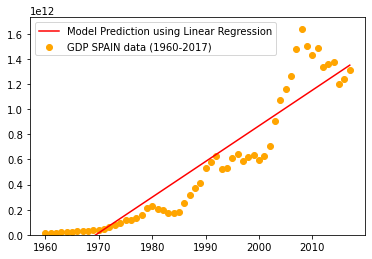

In [24]:
from scipy import stats
X = dfsp.year
y = dfsp.GDP
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
# Model Prediction GDP SPAIN (2018) = $1,378,228,907,914.7578
model = list(map(modelPrediction, X)) # scipy
x_pred = 2018
y_pred = modelPrediction(x_pred)
print('Model Prediction GDP SPAIN (2018) = ${}'.format(y_pred))
print('SciPy')
plt.scatter(X, y, color='orange') # Scatter Plot
plt.plot(X, model, color='red') # linestyle='dashed', marker='o', markersize=12
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction using Linear Regression', 'GDP SPAIN data (1960-2017)'])
plt.show()

Model Prediction GDP CANADA (2018) = $1568074796765.2188
SciPy


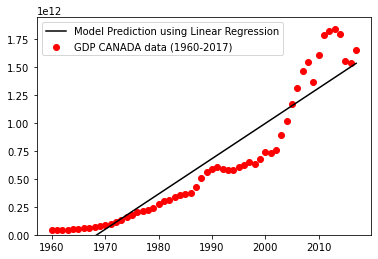

In [25]:
from scipy import stats
X = dfca.year
y = dfca.GDP
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
# Model Prediction GDP CANADA (2018) = $1,568,074,796,765.2188
model = list(map(modelPrediction, X)) # scipy
x_pred = 2018
y_pred = modelPrediction(x_pred)
print('Model Prediction GDP CANADA (2018) = ${}'.format(y_pred))
print('SciPy')
plt.scatter(X, y, color='red') # Scatter Plot
plt.plot(X, model, color='black') # linestyle='dashed', marker='o', markersize=12
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction using Linear Regression', 'GDP CANADA data (1960-2017)'])
plt.show()

Model Prediction GDP INDIA (2018) = $1523808381383.0781
SciPy


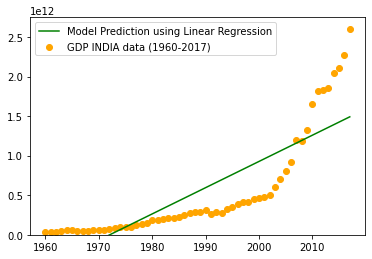

In [26]:
from scipy import stats
X = dfin.year
y = dfin.GDP
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
# Model Prediction GDP INDIA (2018) = $1,523,808,381,383.0781
model = list(map(modelPrediction, X)) # scipy
x_pred = 2018
y_pred = modelPrediction(x_pred)
print('Model Prediction GDP INDIA (2018) = ${}'.format(y_pred))
print('SciPy')
plt.scatter(X, y, color='orange') # Scatter Plot
plt.plot(X, model, color='green') # linestyle='dashed', marker='o', markersize=12
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction using Linear Regression', 'GDP INDIA data (1960-2017)'])
plt.show()

Model Prediction GDP CHINA (2018) = $6347500525036.9375
SciPy


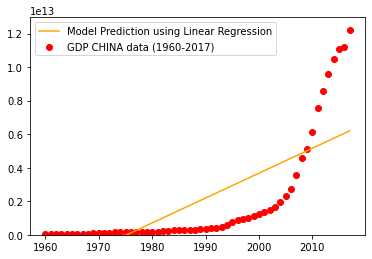

In [27]:
from scipy import stats
X = dfch.year
y = dfch.GDP
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
# Model Prediction GDP CHINA (2018) = $6,347,500,525,036.9375
model = list(map(modelPrediction, X)) # scipy
x_pred = 2018
y_pred = modelPrediction(x_pred)
print('Model Prediction GDP CHINA (2018) = ${}'.format(y_pred))
print('SciPy')
plt.scatter(X, y, color='red') # Scatter Plot
plt.plot(X, model, color='orange') # linestyle='dashed', marker='o', markersize=12
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction using Linear Regression', 'GDP CHINA data (1960-2017)'])
plt.show()

## Linear Regression and time series using SciKit-Learn

MEXICO
score = 0.8811535501661706
coef = [2.36314454e+10]
intercept = -46556368306489.71
SciKit-Learn


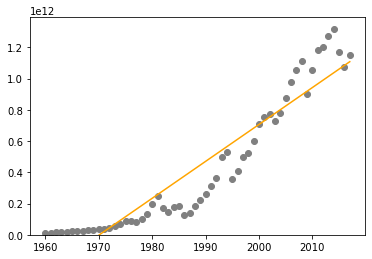

In [28]:
import sklearn
from sklearn.linear_model import LinearRegression
print('MEXICO')
x = dfmx[['year']].values
y = dfmx.GDP.values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
plt.ylim(0) # start at zero
plt.show()

UNITED STATES
score = 0.9385091425599446
coef = [3.36050088e+11]
intercept = -661244082302839.0
SciKit-Learn


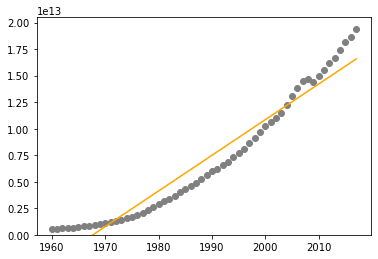

In [29]:
print('UNITED STATES')
x = dfus[['year']].values
y = dfus.GDP.values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
plt.ylim(0) # start at zero
plt.show()

SPAIN
score = 0.8672065603551247
coef = [2.83853349e+10]
intercept = -55903376926306.26
SciKit-Learn


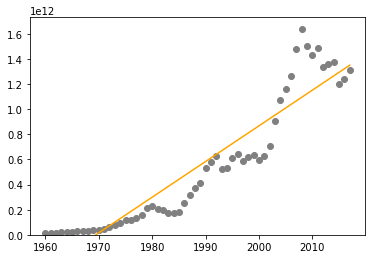

In [30]:
print('SPAIN')
x = dfsp[['year']].values
y = dfsp.GDP.values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
plt.ylim(0) # start at zero
plt.show()

CANADA
score = 0.873875732934217
coef = [3.16411031e+10]
intercept = -62283671237421.58
SciKit-Learn


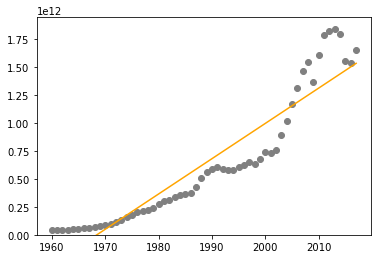

In [31]:
print('CANADA')
x = dfca[['year']].values
y = dfca.GDP.values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
plt.ylim(0) # start at zero
plt.show()

INDIA
score = 0.6958577918405098
coef = [3.31523312e+10]
intercept = -65377596057409.52
SciKit-Learn


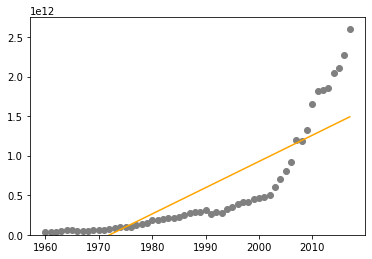

In [32]:
print('INDIA')
x = dfin[['year']].values
y = dfin.GDP.values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
plt.ylim(0) # start at zero
plt.show()

CHINA
score = 0.5650088683589365
coef = [1.48373364e+11]
intercept = -293069949007782.1
SciKit-Learn


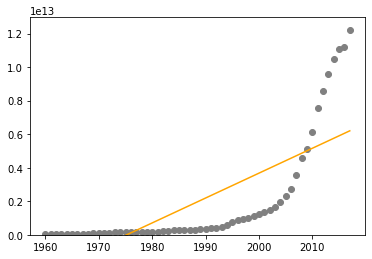

In [33]:
print('CHINA')
x = dfch[['year']].values
y = dfch.GDP.values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
plt.ylim(0) # start at zero
plt.show()

In [34]:
# MEXICO
x = dfmx.year
y = dfmx.GDP
# create a new plot with a title and axis labels
p = figure(title="MEX:GDP-by-year", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
p.line(x, y, line_width=2) # , legend_label="Temp."
# show the results
show(p) # output_file("lines.html") # output to static HTML file

In [35]:
gdpmx = y[15200]
gdpmx = gdpmx / 1000000000000
round(gdpmx, 2)
gdpmx

1.14991879476573

In [36]:
# US
x = dfus.year
y = dfus.GDP
# create a new plot with a title and axis labels
p = figure(title="US:GDP-by-year", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
p.line(x, y, line_width=2) # , legend_label="Temp."
# show the results
show(p) # output_file("lines.html") # output to static HTML file

In [37]:
gdpus = y[15297]
gdpus = gdpus / 1000000000000
round(gdpus, 2)
gdpus

19.390604

In [38]:
# SP
x = dfsp.year
y = dfsp.GDP
# create a new plot with a title and axis labels
p = figure(title="SPAIN:GDP-by-year", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
p.line(x, y, line_width=2) # , legend_label="Temp."
# show the results
show(p) # output_file("lines.html") # output to static HTML file

In [39]:
gdpsp = y[15116]
gdpsp = gdpsp / 1000000000000
round(gdpsp, 2)
gdpsp

1.31132001551599

In [40]:
# CA
x = dfca.year
y = dfca.GDP
# create a new plot with a title and axis labels
p = figure(title="Canada:GDP-by-year", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
p.line(x, y, line_width=2) # , legend_label="Temp."
# show the results
show(p) # output_file("lines.html") # output to static HTML file

In [41]:
gdpca = y[15081]
gdpca = gdpca / 1000000000000
round(gdpca, 2)
gdpca

1.65304279525504

In [42]:
# IN
x = dfin.year
y = dfin.GDP
# create a new plot with a title and axis labels
p = figure(title="India:GDP-by-year", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
p.line(x, y, line_width=2) # , legend_label="Temp."
# show the results
show(p) # output_file("lines.html") # output to static HTML file

In [43]:
gdpin = y[15155]
gdpin = gdpin / 1000000000000
round(gdpin, 2)
gdpin

2.59749116289767

In [44]:
# CH
x = dfch.year
y = dfch.GDP
# create a new plot with a title and axis labels
p = figure(title="China:GDP-by-year", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
p.line(x, y, line_width=2) # , legend_label="Temp."
# show the results
show(p) # output_file("lines.html") # output to static HTML file

In [45]:
gdpch = y[15086]
gdpch = gdpch / 1000000000000
round(gdpch, 2)
gdpch

12.237700479375

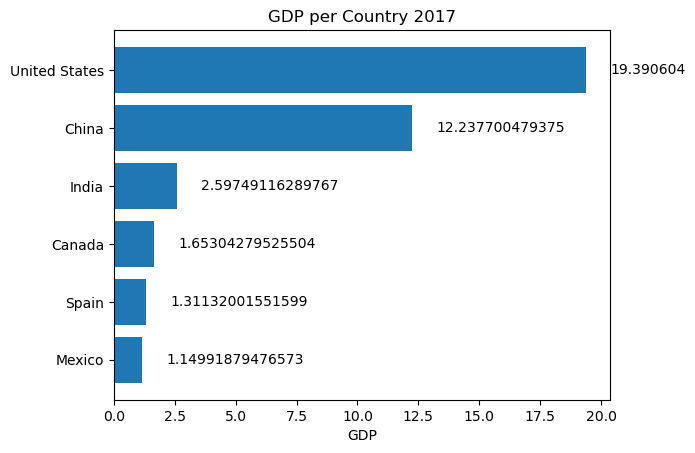

In [46]:
# Fixing random state for reproducibility
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('United States', 'China', 'India', 'Canada', 'Spain', 'Mexico')
y_pos = np.arange(len(y))
x = (gdpus, gdpch, gdpin, gdpca, gdpsp, gdpmx)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('GDP')
ax.set_title('GDP per Country 2017')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

### Global Map

In [47]:
with open('../input/global/countries.json','r') as f:
    geodata = json.load(f)
f.close()
geodata_features = geodata['features']

Here we extract the data from the json file and put it into a format **ColumnDataSource** that Bokeh can read.

There is only one basic color for the maps 

In [48]:
country_xs = []
country_ys = []
country_names = []
country_num_users = []
country_colors = [] # ?

#loop through each of the countries
for aCountry in geodata_features:
    cName = aCountry['properties']['name']
    geometry_type = aCountry['geometry']['type']
    
    #countries that have land masses seperated by water have multiple polygons
    if geometry_type == "MultiPolygon":
        for poly_coords in aCountry['geometry']['coordinates']:
            coords = poly_coords[0]
            country_names.append(cName)
            country_xs.append(list(map(lambda x:x[0],coords)))
            country_ys.append(list(map(lambda x:x[1],coords)))
            country_colors.append("purple")
    else:
        country_names.append(cName)
        coords = aCountry['geometry']['coordinates'][0]
        country_xs.append(list(map(lambda x:x[0],coords)))
        country_ys.append(list(map(lambda x:x[1],coords)))
        country_colors.append("green")

In [49]:
source = ColumnDataSource(
    data = dict(
        x=country_xs,
        y=country_ys,
        color=country_colors,
        name=country_names
    )
)

In [50]:
# Plot the results
TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"
p = figure(title="Countries with a Continous Boarder in Red", tools=TOOLS,
          tooltips=[
        ("Name","@name"),("(Long, Lat)", "($x, $y)")
    ], plot_width=600, plot_height=400)

p.patches('x', 'y',
    fill_color='color', fill_alpha=0.7,
    line_color="white", line_width=0.5,
    source=source)

hover = p.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
show(p)

<a id="step5"></a>
## Dashboard in Tableau Public
https://public.tableau.com/profile/mruanova